### Proyecto Data Science (Delitos 2021) Parte III
#### Regresion Lineal 

#### Realizamos la importacion de los datos

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_delito = pd.read_csv('delitos_2021.csv', sep=";")
df_delito.head()

,anio,mes,dia,fecha,franja,tipo,subtipo,uso_armas,barrio,comuna,latitud,longitud,cantidad
0,2021,Enero,Miércoles,06/01/2021,18,Homicidio,Siniestro Vial,NaN,Constitución,1.0,"-34,62761","-58,379146",1
1,2021,Enero,Jueves,07/01/2021,10,Homicidio,Siniestro Vial,NaN,Mataderos,9.0,"-34,64972969","-58,51058958",1
2,2021,Enero,Domingo,10/01/2021,7,Homicidio,Siniestro Vial,NaN,Parque Chacabuco,7.0,"-34,62917196","-58,43058079",1
3,2021,Enero,Lunes,11/01/2021,9,Homicidio,Siniestro Vial,NaN,Nueva Pompeya,5.0,"-34,63867577","-58,4145554",1
4,2021,Enero,Lunes,11/01/2021,21,Homicidio,Siniestro Vial,NaN,Parque Avellaneda,9.0,"-34,64771436","-58,46806552",1


#### Preprocesamiento de los datos y observar si la agrupacion de datos es correcta

In [19]:
delito.shape
delito.describe()

,anio,comuna,cantidad
count,88567.0,87907.000000,88567.000000
mean,2021.0,7.538899,1.184143
std,0.0,4.554293,0.666930
min,2021.0,0.000000,1.000000
25%,2021.0,4.000000,1.000000
50%,2021.0,7.000000,1.000000
75%,2021.0,12.000000,1.000000
max,2021.0,15.000000,10.000000


#### Agrupacion de los datos

In [2]:
delito = df_delito

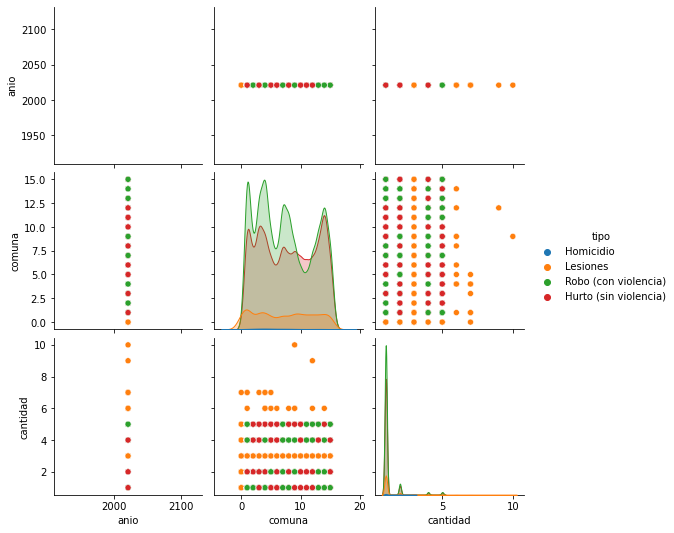

In [3]:
sns.pairplot(delito,hue='tipo')

#### En la agrupacion anterior se ve que los datos, numericos solo podremos utilizar cantidad y sobre esa variable numerica trabajeremos el proyecto. Pequeña grafica, sobre el tipo de datos que mostraremos sobre esas cantidades.

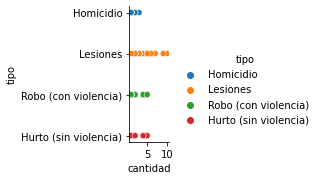

In [4]:
sns.pairplot(delito,x_vars=['cantidad'],y_vars=['tipo'],hue='tipo')

#### Creacion de Variables Ficticias, ya que contamos con datos categoricos de variables independientes (con las variables ficticias limitamos a valor especificos de 0 y 1)

In [21]:
X = delito[['tipo']]
X = pd.get_dummies(data=X, drop_first=True) 
X.head()

,tipo_Hurto (sin violencia),tipo_Lesiones,tipo_Robo (con violencia)
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [22]:
Y = delito['cantidad']

#### Creacion de un conjunto de Datos de entrenemiento y prueba (Dividir)

In [23]:
from sklearn.model_selection import train_test_split
### test de entrenamiento de 70/30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(61996, 3)
(26571, 3)
(61996,)
(26571,)


#### Metrica del Algoritmo de Regresion

In [37]:
from sklearn.linear_model import LinearRegression
### Creacion del modelo
model = LinearRegression()
### Ajuste del Modelo
model.fit(X_train,y_train)
print(model.intercept_)

1.0310077519379957


#### Coeficiente de Variables

In [15]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
tipo_Hurto (sin violencia),0.163765
tipo_Lesiones,0.132080
tipo_Robo (con violencia),0.158559


#### Modelo Predictivo

In [47]:
predictions = model.predict(X_test)
predictions

array([1.19157961, 1.19157961, 1.18441997, ..., 1.19157961, 1.19157961,
       1.161426  ])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cantidad'>

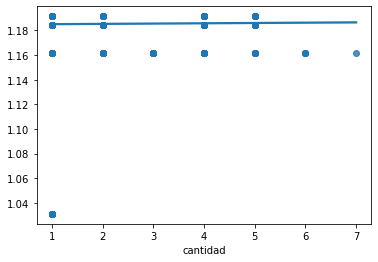

In [48]:
sns.regplot(y_test,predictions)

#### Metrica R2

In [49]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test,y_pred)
print(r2)

0.00018051191666779154


#### Valores Rsquare

In [18]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:               cantidad   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     6.279
Date:                Thu, 25 May 2023   Prob (F-statistic):           0.000296
Time:                        20:39:13   Log-Likelihood:                -72220.
No. Observations:               70853   AIC:                         1.444e+05
Df Residuals:                   70849   BIC:                         1.445e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               